## Prepare train_data and test_data

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from hypergbm import make_experiment
from hypernets.tabular.metrics import metric_to_scoring
from sklearn.metrics import get_scorer

07-23 16:40:39 I hypernets.u._fsutils.py 300 - use /home/wumy/tmp/workdir as working directory.


In [2]:
data = pd.read_csv('datasets/Metro_Interstate_Traffic_Volume/data.csv.gz')

In [3]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [5]:
##Transform data_time' dtype to datetime
data.date_time = pd.to_datetime(data.date_time)

In [6]:
train_data,test_data = train_test_split(data,test_size=0.2)
X_train = train_data.copy()
y_train = X_train.pop('traffic_volume')
X_test = test_data.copy()
y_test = X_test.pop('traffic_volume')

# Without feature_generation
_best_reward is 1868

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(38563, 8)","(38563,)",None,None,"(9641, 9)",regression


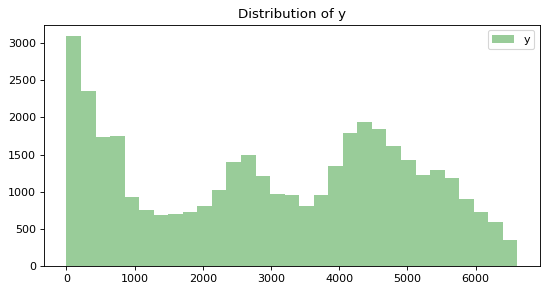

07-23 16:40:41 W hypernets.e.compete.py 1167 - X_train['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description', 'date_time'] and X_test['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description', 'date_time', 'traffic_volume'] have different columns before data_clean, try fix it.


## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,8888
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[holiday, temp, rain_1h, snow_1h, clouds_all, ..."
1,selected_features,"[holiday, temp, rain_1h, snow_1h, clouds_all, ..."
2,unselected_features,[]
3,X_train.shape,"(38563, 8)"
4,y_train.shape,"(38563,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,"(9641, 8)"
8,unselected_reason,{}
9,kept/dropped feature count,8/0


## Drift Detection

### Initliazed parameters

,key,value
0,min_features,10
1,name,drift_detection
2,num_folds,5
3,remove_shift_variable,True
4,remove_size,0.1
5,threshold,0.7
6,variable_shift_threshold,0.7


### Fitted parameters

,key,value
0,input_features,"[temp, rain_1h, snow_1h, clouds_all, date_time..."
1,selected_features,"[holiday, weather_main, weather_description, I..."
2,unselected_features,[date_time]
3,history,"[{'auc': 0.5031162306036441, 'n_features': 15,..."
4,scores,"{'holiday': 0.5, 'weather_main': 0.51211479884..."
5,kept/dropped feature count,15/1


## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,max_trials,None
2,name,space_searching
3,num_folds,3
4,size,None
5,time_limit,None


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,11,3842.412673,2,1932.557951,40.150366,12,30


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,2,1932.557951,1.939475,"[2, 1, 1, 3, 0, 4, 0]"
1,9,1941.158802,4.238121,"[0, 2, 0, 1, 270, 0, 3, 0, 3]"
2,1,1961.110613,1.016553,"[0, 2, 0, 0, 335, 3, 2, 3, 0]"
3,10,1968.445540,11.194408,"[0, 1, 0, 1, 135, 2, 3, 0, 4]"
4,12,1973.376408,6.624737,"[0, 2, 0, 0, 455, 1, 0, 5, 2]"


#### Best Trial:

key,value
signature,697999d4a44fd6f9b39f160ab5ad2fd2
vectors,"[2, 1, 1, 3, 0, 4, 0]"
0-estimator_options.hp_or,2
1-numeric_imputer_0.strategy,median
2-numeric_scaler_optional_0.hp_opt,True
3-Module_CatBoostEstimator_1.learning_rate,0.1
4-Module_CatBoostEstimator_1.depth,3
5-Module_CatBoostEstimator_1.l2_leaf_reg,30
6-numeric_or_scaler_0.hp_or,0


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,10,1904.059547,9,1899.747186,85.920326,10,10


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,9,1899.747186,22.646762,"[0, 1, 0, 1, 135, 2, 3, 0, 4]"
1,10,1904.059547,1.951646,"[0, 2, 0, 0, 335, 3, 2, 3, 0]"
2,8,1966.208321,31.501824,"[0, 2, 0, 0, 455, 1, 0, 5, 2]"
3,7,1969.656044,6.574316,"[2, 1, 0, 0, 2, 1]"
4,5,2652.185281,3.921979,"[1, 0, 1, 2, 3, 1, 3, 0, 1, 3, 1]"


#### Best Trial:

key,value
signature,541efd857751b207e901868fb0bc398b
vectors,"[0, 1, 0, 1, 135, 2, 3, 0, 4]"
0-estimator_options.hp_or,0
1-numeric_imputer_0.strategy,median
2-numeric_scaler_optional_0.hp_opt,False
3-Module_LightGBMEstimator_1.boosting_type,dart
4-Module_LightGBMEstimator_1.num_leaves,135
5-Module_LightGBMEstimator_1.max_depth,7
6-Module_LightGBMEstimator_1.learning_rate,0.1
7-Module_LightGBMEstimator_1.reg_alpha,0.001


### Fitted parameters

,key,value
0,input_features,"[holiday, weather_main, weather_description, I..."
1,best_reward,556.353
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,"make_scorer(mean_squared_error, greater_is_bet..."


### Fitted parameters

,0,1
0,weights,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,scores,"[-556.3527991671803, -556.3527991671803, -556...."
2,best_stack,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,hits,{0: 20}
4,ensemble_size,20


In [7]:
experiment = make_experiment(train_data.copy(),test_data=test_data.copy(),target='traffic_volume',
                             random_state=8888,max_trials=10)
estimator = experiment.run()

In [8]:
scorer = get_scorer(metric_to_scoring('rmse'))
score = scorer(estimator, X_test, y_test)*scorer._sign
score

1868.3236500620542

# Introduce func of feature_generation
-- visit https://github.com/alteryx/featuretools for more datails

In [9]:
from hypernets.tabular.feature_generators import FeatureGenerationTransformer

In [10]:
featureGenerationTransformer = FeatureGenerationTransformer(datetime_cols=['date_time'])
featureGenerationTransformer.fit(pd.DataFrame(X_train['date_time']))
X_test_new = featureGenerationTransformer.transform(pd.DataFrame(X_test['date_time']))

Elapsed: 00:00 | Progress: 100%|██████████


In [11]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9641 entries, 0 to 9640
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date_time                9641 non-null   datetime64[ns]
 1   DAY__date_time__         9641 non-null   int64         
 2   HOUR__date_time__        9641 non-null   int64         
 3   IS_WEEKEND__date_time__  9641 non-null   bool          
 4   MINUTE__date_time__      9641 non-null   int64         
 5   MONTH__date_time__       9641 non-null   int64         
 6   SECOND__date_time__      9641 non-null   int64         
 7   WEEK__date_time__        9641 non-null   int64         
 8   WEEKDAY__date_time__     9641 non-null   int64         
dtypes: bool(1), datetime64[ns](1), int64(7)
memory usage: 687.3 KB


In [12]:
X_test_new.head()

,date_time,DAY__date_time__,HOUR__date_time__,IS_WEEKEND__date_time__,MINUTE__date_time__,MONTH__date_time__,SECOND__date_time__,WEEK__date_time__,WEEKDAY__date_time__
e_hypernets_ft_index,,,,,,,,,
0,2013-03-07 07:00:00,7,7,False,0,3,0,10,3
1,2012-12-15 07:00:00,15,7,True,0,12,0,50,5
2,2017-04-15 18:00:00,15,18,True,0,4,0,15,5
3,2015-09-23 16:00:00,23,16,False,0,9,0,39,2
4,2014-01-16 16:00:00,16,16,False,0,1,0,3,3


# Use feature_generation
_best_reward is 550

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(38563, 8)","(38563,)",None,None,"(9641, 9)",regression


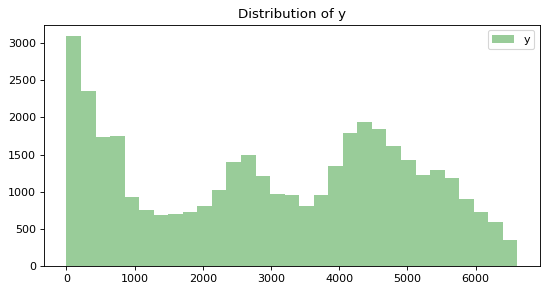

07-23 16:43:11 W hypernets.e.compete.py 1167 - X_train['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description', 'date_time'] and X_test['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description', 'date_time', 'traffic_volume'] have different columns before data_clean, try fix it.


## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,8888
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[holiday, temp, rain_1h, snow_1h, clouds_all, ..."
1,selected_features,"[holiday, temp, rain_1h, snow_1h, clouds_all, ..."
2,unselected_features,[]
3,X_train.shape,"(38563, 8)"
4,y_train.shape,"(38563,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,"(9641, 8)"
8,unselected_reason,{}
9,kept/dropped feature count,8/0


## Feature Generation

### Initliazed parameters

,key,value
0,categories_cols,None
1,continuous_cols,None
2,datetime_cols,[date_time]
3,feature_selection_args,None
4,latlong_cols,None
5,max_depth,1
6,name,feature_generation
7,text_cols,None
8,trans_primitives,None


Elapsed: 00:00 | Progress: 100%|██████████
Elapsed: 00:00 | Progress: 100%|██████████


### Fitted parameters

,key,value
0,input_features,"[holiday, temp, rain_1h, snow_1h, clouds_all, ..."
1,trans_primitives,"[month, week, day, hour, minute, second, weekd..."
2,output_feature_names,"[temp, rain_1h, snow_1h, clouds_all, date_time..."


## Drift Detection

### Initliazed parameters

,key,value
0,min_features,10
1,name,drift_detection
2,num_folds,5
3,remove_shift_variable,True
4,remove_size,0.1
5,threshold,0.7
6,variable_shift_threshold,0.7


### Fitted parameters

,key,value
0,input_features,"[temp, rain_1h, snow_1h, clouds_all, date_time..."
1,selected_features,"[holiday, weather_main, weather_description, I..."
2,unselected_features,[date_time]
3,history,"[{'auc': 0.5031162306036441, 'n_features': 15,..."
4,scores,"{'holiday': 0.5, 'weather_main': 0.51211479884..."
5,kept/dropped feature count,15/1


## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,max_trials,None
2,name,space_searching
3,num_folds,3
4,size,None
5,time_limit,None


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,10,1754.167305,1,572.925423,40.192393,11,30


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,1,572.925423,7.673278,"[2, 0, 0, 2, 2, 4]"
1,8,623.829120,7.727203,"[0, 3, 0, 0, 85, 1, 1, 1, 1]"
2,7,692.312869,4.251023,"[0, 1, 1, 2, 510, 0, 1, 1, 1, 0]"
3,4,872.794188,6.437847,"[2, 1, 1, 1, 3, 4, 0]"
4,2,975.067876,1.281065,"[1, 0, 1, 0, 2, 0, 0, 0, 1, 3, 4]"


#### Best Trial:

key,value
signature,1eda647a850f9867b0cdd8fddfa2c686
vectors,"[2, 0, 0, 2, 2, 4]"
0-estimator_options.hp_or,2
1-numeric_imputer_0.strategy,mean
2-numeric_scaler_optional_0.hp_opt,False
3-Module_CatBoostEstimator_1.learning_rate,0.5
4-Module_CatBoostEstimator_1.depth,7
5-Module_CatBoostEstimator_1.l2_leaf_reg,30


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,10,556.352799,10,556.352799,73.38256,10,10


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,10,556.352799,11.690335,"[0, 3, 0, 0, 85, 1, 1, 1, 1]"
1,9,651.063435,6.776823,"[0, 1, 1, 2, 510, 0, 1, 1, 1, 0]"
2,8,728.854407,13.774789,"[2, 1, 1, 1, 3, 4, 0]"
3,3,1235.307981,3.422261,"[1, 2, 1, 1, 2, 0, 2, 2, 3, 2, 2]"
4,5,1694.560795,10.672193,"[2, 0, 0, 0, 3, 1]"


#### Best Trial:

key,value
signature,541efd857751b207e901868fb0bc398b
vectors,"[0, 3, 0, 0, 85, 1, 1, 1, 1]"
0-estimator_options.hp_or,0
1-numeric_imputer_0.strategy,most_frequent
2-numeric_scaler_optional_0.hp_opt,False
3-Module_LightGBMEstimator_1.boosting_type,gbdt
4-Module_LightGBMEstimator_1.num_leaves,85
5-Module_LightGBMEstimator_1.max_depth,5
6-Module_LightGBMEstimator_1.learning_rate,0.01
7-Module_LightGBMEstimator_1.reg_alpha,0.01


### Fitted parameters

,key,value
0,input_features,"[holiday, weather_main, weather_description, I..."
1,best_reward,556.353
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,"make_scorer(mean_squared_error, greater_is_bet..."


### Fitted parameters

,0,1
0,weights,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,scores,"[-556.3527991671803, -556.3527991671803, -556...."
2,best_stack,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,hits,{0: 20}
4,ensemble_size,20


Elapsed: 00:00 | Progress: 100%|██████████


550.4922636367852

In [13]:
experiment = make_experiment(train_data.copy(),test_data=test_data.copy(),target='traffic_volume',
                             random_state=8888,max_trials=10,
                             feature_generation=True,
                             feature_generation_datetime_cols=['date_time'],
                            )
estimator = experiment.run()
scorer = get_scorer(metric_to_scoring('rmse'))
score = scorer(estimator, X_test, y_test)*scorer._sign
score